## 2.4
bayes classifier

In [2]:
%matplotlib inline
import random
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
"""FIGURE 2.5. The optimal Bayes decision boundary for the simulation example.
Since the generating density is known for each class, this decision boundary can be
calculated exactly."""
sample_size = 100
# Parameters for mean distributions
mean_blue = [1, 0]
mean_orange = [0, 1]
mean_cov = scipy.eye(2)
mean_size = 10

# Additional parameters for blue and orange distributions
sample_cov = scipy.eye(2)/5

# Generate mean components for blue and orange (10 means for each)
sample_blue_mean = scipy.random.multivariate_normal(mean_blue, mean_cov, mean_size)
sample_orange_mean = scipy.random.multivariate_normal(mean_orange, mean_cov, mean_size)

# Generate blue points
sample_blue = scipy.array([
    scipy.random.multivariate_normal(sample_blue_mean[r], sample_cov)
    for r in scipy.random.randint(0, 10, 100)
])
y_blue = scipy.zeros(sample_size)

# Generate orange points
sample_orange = scipy.array([
    scipy.random.multivariate_normal(sample_orange_mean[r], sample_cov)
    for r in scipy.random.randint(0, 10, 100)
])
y_orange = scipy.ones(sample_size)

data_x = scipy.concatenate((sample_blue, sample_orange), axis=0)
data_y = scipy.concatenate((y_blue, y_orange))

In [4]:
def density_blue(arr:scipy.ndarray)->scipy.ndarray:
    densities = scipy.array([
        scipy.stats.multivariate_normal.pdf(arr, mean=m, cov=mean_cov)
        for m in sample_blue_mean
    ])
    return densities.mean(axis=0)

def density_orange(arr:scipy.ndarray)->scipy.ndarray:
    densities = scipy.array([
        scipy.stats.multivariate_normal.pdf(arr, mean=m, cov=mean_cov)
        for m in sample_orange_mean
    ])
    return densities.mean(axis=0)

In [10]:
min_x = data_x.min(axis=0)
max_x = data_x.max(axis=0)
print(min_x, max_x)
arr = scipy.array([(i, j)
        for i in scipy.linspace(min_x[0]-.1, max_x[0]+.1, 100)
            for j in scipy.linspace(min_x[1]-.1, max_x[1]+.1, 100)])
proba_blue = density_blue(arr)
proba_orange = density_orange(arr)

[-2.41909968 -2.33322212] [ 3.48067763  3.09622446]


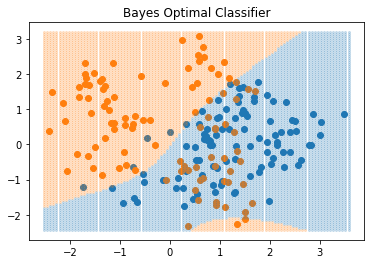

In [11]:
# Plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
# Original data
ax.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
# Bayes classifier
mask_blue = proba_blue > proba_orange
mask_orange = ~mask_blue
ax.plot(arr[mask_blue, 0], arr[mask_blue, 1], 'o',
        markersize=2, color='C0', alpha=.2)
ax.plot(arr[mask_orange, 0], arr[mask_orange, 1], 'o',
        markersize=2, color='C1', alpha=.2)
ax.set_title('Bayes Optimal Classifier')
plt.show()

## ex2.8

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv("./data/zipcode/zip.train", sep=" ", header=None).dropna(how='all', axis=1)
test_data = pd.read_csv("./data/zipcode/zip.test", sep=" ", header=None)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [5]:
X_train = train_data.loc[:, 1:]
y_train = train_data[0]

X_test = test_data.loc[:, 1:]
y_test = test_data[0]

### 線形回帰分析

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
l_clf = LinearDiscriminantAnalysis()

In [7]:
l_clf.fit(X_train, y_train)
y_train_pred = l_clf.predict(X_train)
y_test_pred = l_clf.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 Train : %.3f, Test : %.3f' % (l_clf.score(X_train, y_train), l_clf.score(X_test, y_test)))

MSE Train : 0.979, Test : 1.785
R^2 Train : 0.938, Test : 0.885


In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

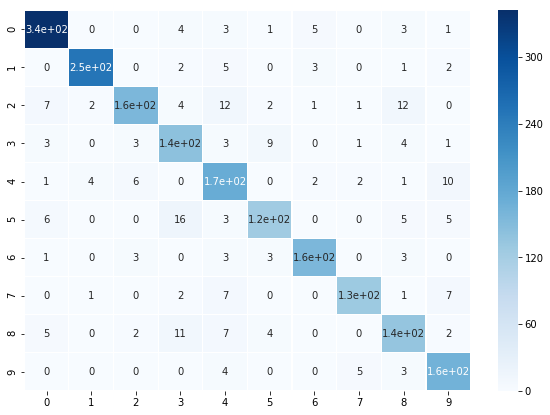

In [20]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cnf_matrix, annot=True, cmap="Blues", linewidths=0.1)

### 最近傍法


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
k_clf  = KNeighborsClassifier(n_neighbors = 3, weights ='uniform')

In [18]:
k_clf.fit(X_train, y_train)
y_train_pred = k_clf.predict(X_train)
y_test_pred = k_clf.predict(X_test)

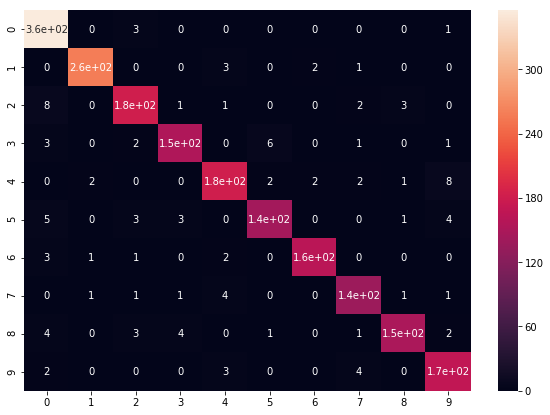

In [19]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cnf_matrix, annot=True)

In [20]:
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 Train : %.3f, Test : %.3f' % (k_clf.score(X_train, y_train), k_clf.score(X_test, y_test)))

MSE Train : 0.256, Test : 1.001
R^2 Train : 0.987, Test : 0.945
